In [177]:
from qlasskit import qlassf, Qint, Qint2


@qlassf
def sum_two_numbers(a: Qint[2], b: Qint[2]) -> Qint[2]:
    return max(a, b)

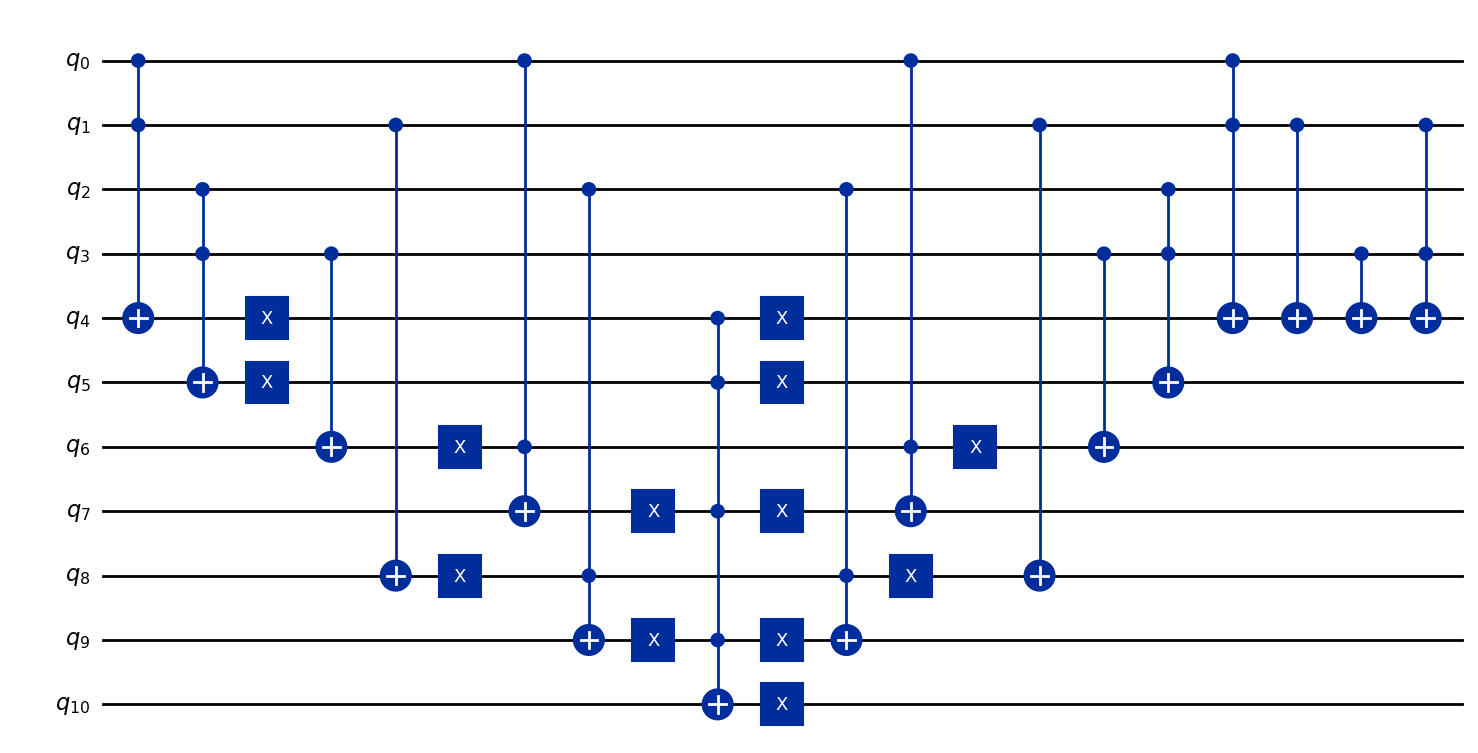

In [178]:
circuit = sum_two_numbers.export("qiskit")
circuit.draw("mpl")

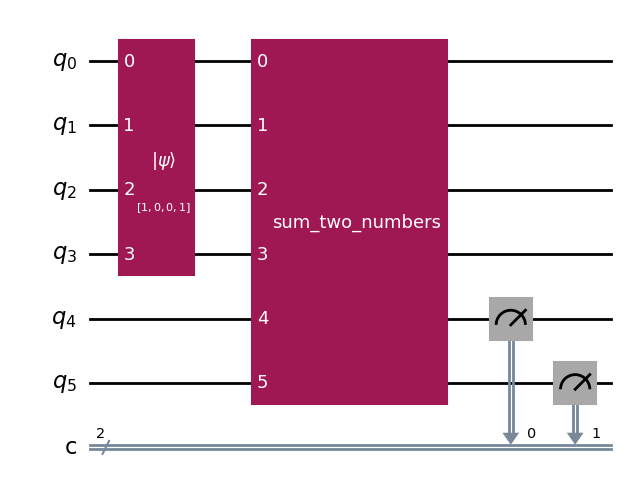

In [3]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(sum_two_numbers.num_qubits, len(sum_two_numbers.output_qubits))

qc.initialize(sum_two_numbers.encode_input(Qint2(1), Qint2(2)), sum_two_numbers.input_qubits)
qc.append(sum_two_numbers.gate("qiskit"), sum_two_numbers.qubits)
qc.measure(sum_two_numbers.output_qubits, range(len(sum_two_numbers.output_qubits)))
qc.draw("mpl")

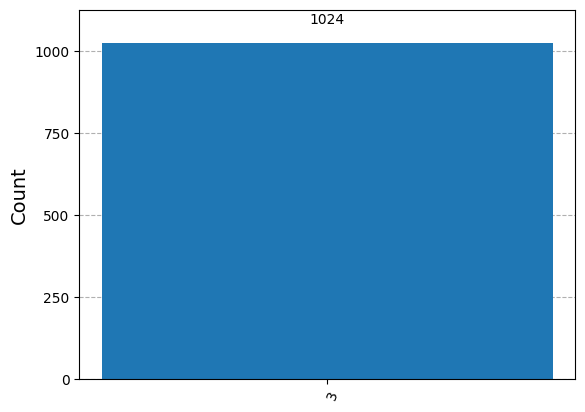

In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

simulator = AerSimulator()
circ = transpile(qc, simulator)
result = simulator.run(circ).result()
counts = result.get_counts(circ)

counts_readable = sum_two_numbers.decode_counts(counts)
plot_histogram(counts_readable)

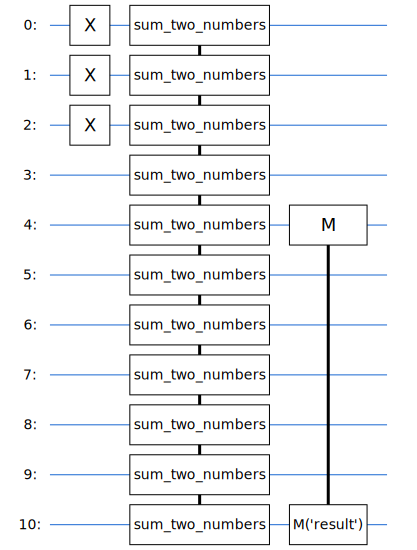

In [183]:
from cirq.contrib.svg import SVGCircuit
import cirq
circuit = cirq.Circuit()
circuit.append(cirq.X(cirq.LineQubit(0)))
#circuit.append(cirq.X(cirq.LineQubit(1)))
circuit.append(cirq.X(cirq.LineQubit(2)))
circuit.append(sum_two_numbers.export("cirq"))
#SVGCircuit(circuit)
#circuit = sum_two_numbers.export("cirq")
circuit.append(cirq.measure(cirq.LineQubit(10), cirq.LineQubit(4),  key='result'))

# Add noise to the circuit.
noisy = circuit.with_noise(cirq.depolarize(p=0.05))

SVGCircuit(circuit)

Simulate the circuit:


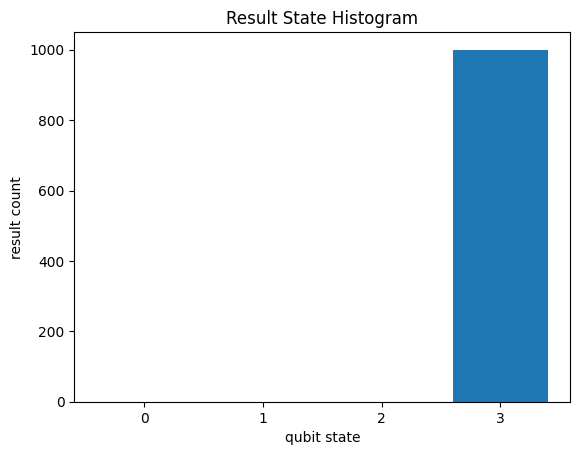

In [184]:
import matplotlib.pyplot as plt

s = cirq.Simulator()
print('Simulate the circuit:')
# Sample the circuit

samples = s.run(circuit, repetitions=1000)
cirq.plot_state_histogram(samples, plt.subplot())
plt.show()